# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### <center> Generate the Cities List by Using the `citipy` Library <center>

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


## <center> Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude 

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}+&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | olyokminsk
City not found. Skipping...
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | salinopolis
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | luau
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | al jawf
Processing Record 17 of Set 1 | dampit
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | nema
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | chom bueng
Processing Record 22 of Set

Processing Record 28 of Set 4 | ancud
Processing Record 29 of Set 4 | bonao
Processing Record 30 of Set 4 | thompson
Processing Record 31 of Set 4 | rongelap
Processing Record 32 of Set 4 | port angeles
Processing Record 33 of Set 4 | koraput
Processing Record 34 of Set 4 | grand falls-windsor
Processing Record 35 of Set 4 | shiyan
Processing Record 36 of Set 4 | great falls
Processing Record 37 of Set 4 | shagonar
Processing Record 38 of Set 4 | trincomalee
Processing Record 39 of Set 4 | gobabis
Processing Record 40 of Set 4 | taro
City not found. Skipping...
Processing Record 41 of Set 4 | male
Processing Record 42 of Set 4 | agadez
Processing Record 43 of Set 4 | boende
Processing Record 44 of Set 4 | ahtari
Processing Record 45 of Set 4 | penafiel
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | cova figueira
Processing Record 48 of Set 4 | oromocto
Processing Record 49 of Set 4 | abomsa
Processing Record 0 of Set 5 | ivdel'
City not found. Skipping...
Processi

Processing Record 10 of Set 8 | urangan
Processing Record 11 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 12 of Set 8 | van
Processing Record 13 of Set 8 | penzance
Processing Record 14 of Set 8 | rikaze
Processing Record 15 of Set 8 | playa vicente
Processing Record 16 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 17 of Set 8 | recani
City not found. Skipping...
Processing Record 18 of Set 8 | kill devil hills
Processing Record 19 of Set 8 | horta
Processing Record 20 of Set 8 | fort bragg
Processing Record 21 of Set 8 | krasnoural'sk
City not found. Skipping...
Processing Record 22 of Set 8 | marsabit
Processing Record 23 of Set 8 | al bayda'
City not found. Skipping...
Processing Record 24 of Set 8 | kapuskasing
Processing Record 25 of Set 8 | manokwari
Processing Record 26 of Set 8 | tchintabaraden
City not found. Skipping...
Processing Record 27 of Set 8 | new norfolk
Processing Record 28 of Set 8 | queenstown
Processing Record 29 of

Processing Record 40 of Set 11 | conde
Processing Record 41 of Set 11 | trosa
Processing Record 42 of Set 11 | zaozersk
Processing Record 43 of Set 11 | jianshui
City not found. Skipping...
Processing Record 44 of Set 11 | obock
Processing Record 45 of Set 11 | mcalester
Processing Record 46 of Set 11 | lerwick
Processing Record 47 of Set 11 | dunedin
Processing Record 48 of Set 11 | ipatovo
Processing Record 49 of Set 11 | zimapan
Processing Record 0 of Set 12 | virac
Processing Record 1 of Set 12 | pontes e lacerda
Processing Record 2 of Set 12 | dingcheng
Processing Record 3 of Set 12 | kapa'a
City not found. Skipping...
Processing Record 4 of Set 12 | daryapur
Processing Record 5 of Set 12 | vilyuysk
Processing Record 6 of Set 12 | reggane
Processing Record 7 of Set 12 | guichon
Processing Record 8 of Set 12 | mao
Processing Record 9 of Set 12 | vilhena
Processing Record 10 of Set 12 | coquimbo
Processing Record 11 of Set 12 | bin yauri
Processing Record 12 of Set 12 | masina
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          507
Lat           507
Lng           507
Max Temp      507
Humidity      507
Cloudiness    507
Wind Speed    507
Country       507
Date          507
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-5.12,94,100,7.70,GL,1702241839
1,stanley,54.8680,-1.6985,5.99,97,40,1.03,GB,1702241839
2,waitangi,-43.9535,-176.5597,13.79,56,2,2.95,NZ,1702241839
3,whitehorse,60.7161,-135.0538,-15.66,84,75,2.06,CA,1702241839
4,port-aux-francais,-49.3500,70.2167,3.41,77,50,9.75,TF,1702241840


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-5.12,94,100,7.70,GL,1702241839
1,stanley,54.8680,-1.6985,5.99,97,40,1.03,GB,1702241839
2,waitangi,-43.9535,-176.5597,13.79,56,2,2.95,NZ,1702241839
3,whitehorse,60.7161,-135.0538,-15.66,84,75,2.06,CA,1702241839
4,port-aux-francais,-49.3500,70.2167,3.41,77,50,9.75,TF,1702241840


## <center> Create the Scatter Plots Requested <center>

### <center>  Latitude Vs. Temperature <center> 

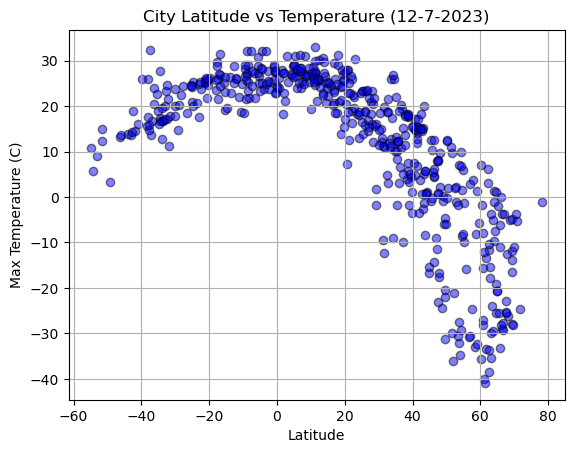

In [8]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Temperature (12-7-2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### <center>  Latitude Vs. Humidity <center> 

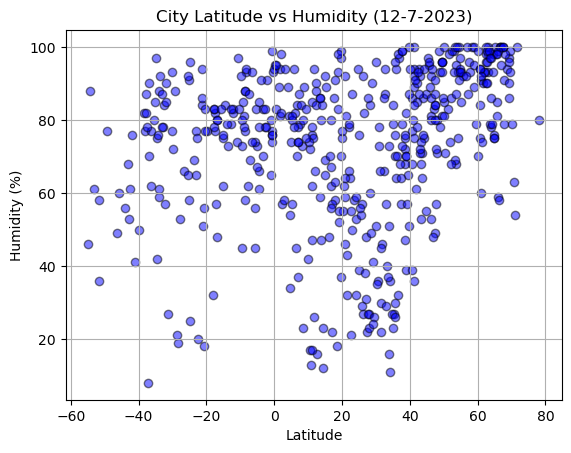

In [9]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (12-7-2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

### <center> Latitude Vs. Cloudiness <center>

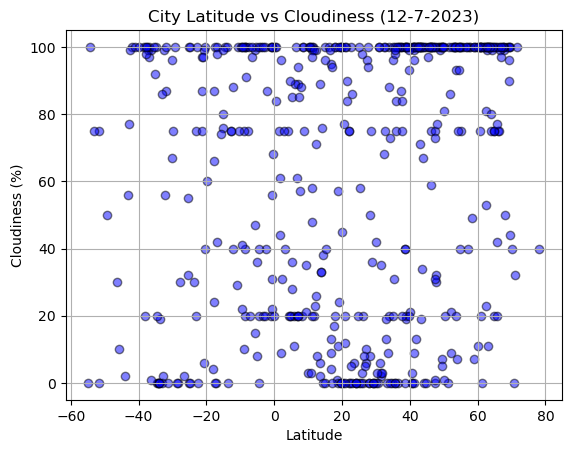

In [10]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (12-7-2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

### <center> Latitude vs. Wind Speed Plot <center>

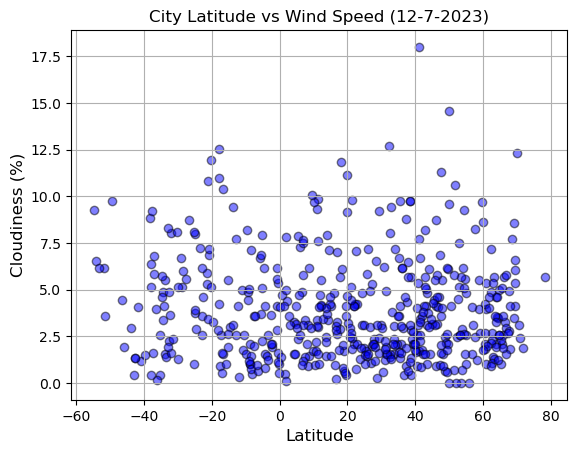

In [11]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness (%)",fontsize=12)
plt.title("City Latitude vs Wind Speed (12-7-2023)", fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## <center> Requirement 2: Compute Linear Regression for Each Relationship <center> 


In [44]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values , y_values , title, xlabel, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Scatter plot graph, Labels, Title, Anotate, Legend
    plt.scatter(x_values , y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, coordinates ,fontsize=12, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    print(f'The r-squared is: {rvalue}')
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-5.12,94,100,7.70,GL,1702241839
1,stanley,54.8680,-1.6985,5.99,97,40,1.03,GB,1702241839
3,whitehorse,60.7161,-135.0538,-15.66,84,75,2.06,CA,1702241839
5,colonia,40.5746,-74.3021,17.07,86,100,2.57,US,1702241840
7,hamilton,43.2334,-79.9496,5.10,68,100,4.12,CA,1702241697


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,13.79,56,2,2.95,NZ,1702241839
4,port-aux-francais,-49.3500,70.2167,3.41,77,50,9.75,TF,1702241840
6,port mathurin,-19.6833,63.4167,26.15,77,60,3.24,MU,1702241840
9,salinopolis,-0.6136,-47.3561,27.51,76,22,5.33,BR,1702241841
10,adamstown,-25.0660,-130.1015,20.98,58,0,3.76,PN,1702241841


###  <center> Temperature vs. Latitude Linear Regression Plot <center> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: -0.8322664984508246


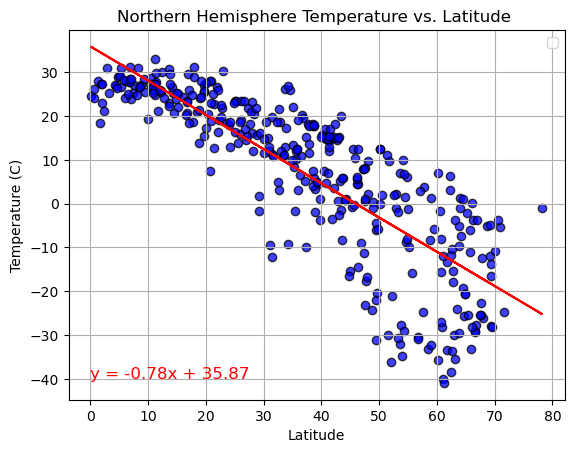

In [47]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regression_plot(x ,y, "Northern Hemisphere Temperature vs. Latitude " ,"Latitude", "Temperature (C)", (0,-40) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.7409633609439391


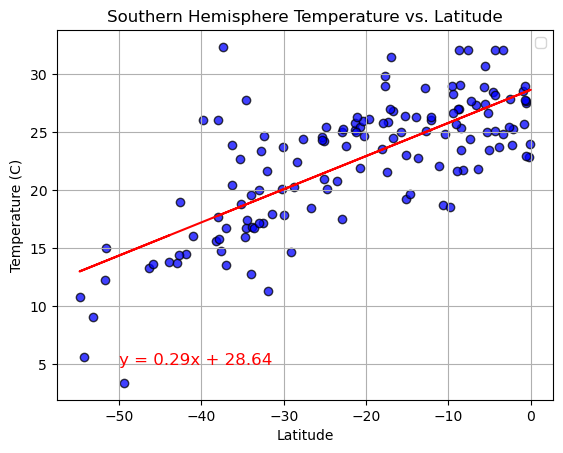

In [48]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regression_plot(x ,y, "Southern Hemisphere Temperature vs. Latitude" ,"Latitude", "Temperature (C)", (-50,5) )

**Discussion about the linear relationship:** 
The relationship beetween the 2 graphs above are, as the Northern hemisphere increase the latitude the temperature decreases while the Southern hemisphere i ass you get closer to 0 in latitude the temperature increases.


### <center> Humidity vs. Latitude Linear Regression Plot <center> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.38663151278342295


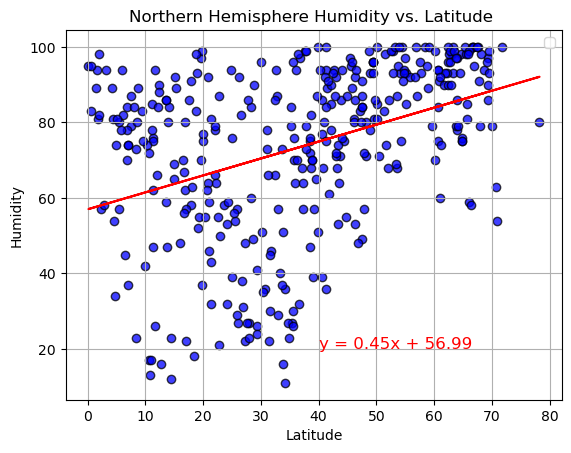

In [49]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regression_plot(x ,y, "Northern Hemisphere Humidity vs. Latitude " ,"Latitude", "Humidity", (40,20) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.2737360965793839


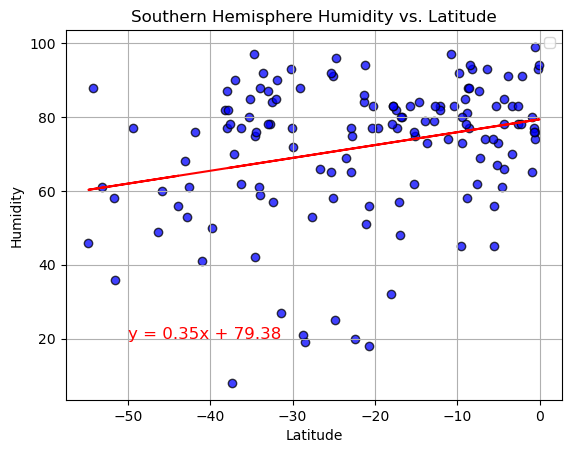

In [50]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regression_plot(x ,y, "Southern Hemisphere Humidity vs. Latitude" ,"Latitude", "Humidity", (-50,20) )

**Discussion about the linear relationship:** 
The relationship in the graphs Northern and southern hemisphere Humidity vs latitude is as the latitude increases the humidity increases as well for both hemisphere's.

### <center>  Cloudiness vs. Latitude Linear Regression Plot <center>  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.26809978716120536


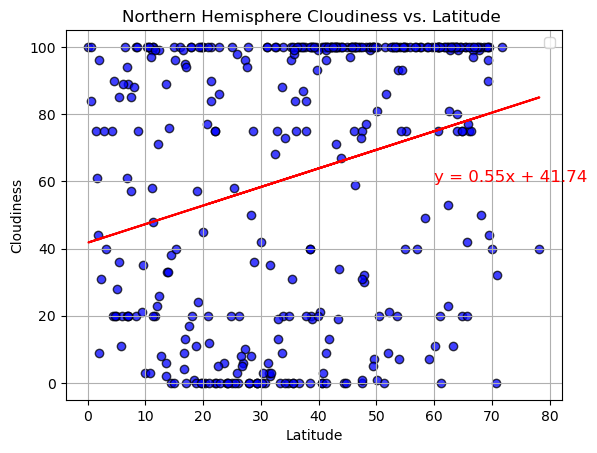

In [51]:
# Northern Hemisphere
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regression_plot(x ,y, "Northern Hemisphere Cloudiness vs. Latitude " ,"Latitude", "Cloudiness", (60,60) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.06399360971036974


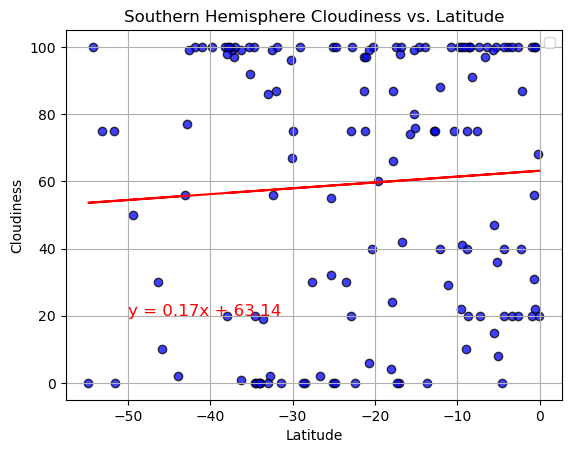

In [55]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regression_plot(x ,y, "Southern Hemisphere Cloudiness vs. Latitude" ,"Latitude", "Cloudiness", (-50,20) )

**Discussion about the linear relationship:** 
There is no major relationship between northern and southern hemispheres about cloudiness and latitude but as the latitude increase in the northern hemisphere the cloudiness increase faster that the southern.

### <center>  Wind Speed vs. Latitude Linear Regression Plot <center> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.016197579785830765


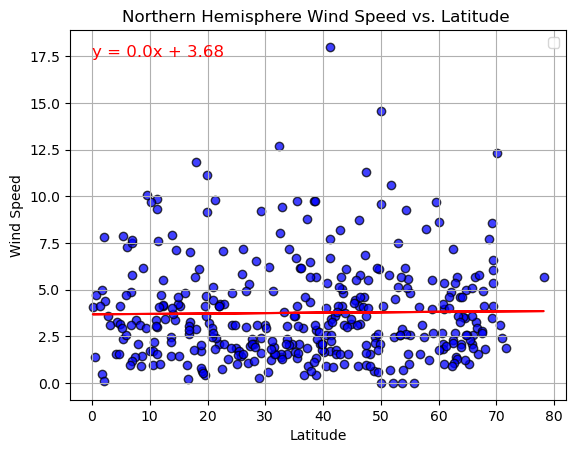

In [56]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regression_plot(x ,y, "Northern Hemisphere Wind Speed vs. Latitude " ,"Latitude", "Wind Speed", (0,17.5) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: -0.18011435518743535


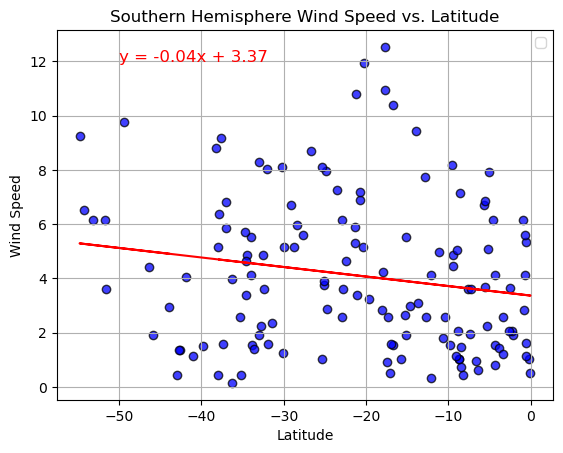

In [58]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regression_plot(x ,y, "Southern Hemisphere Wind Speed vs. Latitude" ,"Latitude", "Wind Speed", (-50,12) )

**Discussion about the linear relationship:** 
The relationship in this case between the northern and the southern is the wind speed tend to reduce speed as approach 0-equator from the southern hemisphere while in the northern hemisphere the wind speed seems to be pretty stable.